In [1]:
from __future__ import division
import pandas as pd
import numpy as np
from numpy import argmax
from scipy import constants

import os
import sys

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split



import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
%matplotlib inline
plt.ion()

In [2]:
# Load the energy matrices from Kinney et al. 2010
crp_df = pd.read_csv('crp_tau_final_all.26.txt', sep = "\t", usecols = range(1,5))
rnap_df = pd.read_csv('rnap_tau_final_all.41.txt', sep = "\t", usecols = range(1,5))

# Convert the dataframe to numpy array for downstream processing
crp_array = pd.DataFrame.to_numpy(crp_df)
rnap_array = pd.DataFrame.to_numpy(rnap_df)

In [3]:
crp_df.head()

,par_A,par_C,par_G,par_T
0,0.00,0.55,0.45,0.19
1,0.00,0.92,0.65,0.31
2,0.00,0.96,0.72,0.11
3,0.21,1.04,1.06,0.00
4,0.13,0.46,0.32,0.00


Text(0,0.5,'$-\\Delta \\Delta G$ ($k_{cal}/mol$)')

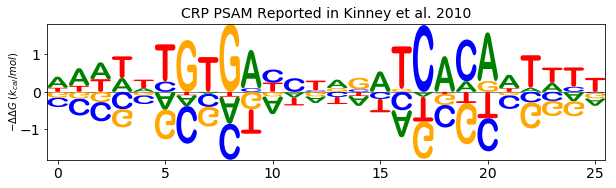

In [4]:
import logomaker

crp_df.columns = ['A','C','G','T']
crp_logo_df = logomaker.Logo(-crp_df,center_values=True, font_name='Arial Rounded MT Bold')
plt.tick_params(labelsize=14)
plt.title('CRP PSAM Reported in Kinney et al. 2010',fontsize=14)
plt.ylabel("$-\Delta \Delta G$ ($k_{cal}/mol$)", labelpad=-1)

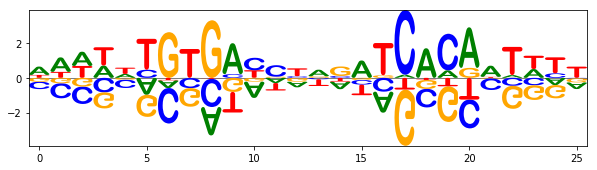

In [5]:
consensus_sequence = "AATTAATGTGAGTTAGCTCACTCATTAGGCACCCCAGGCTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGG"
crp_df_nn = pd.read_csv('inferred_crp_matrix.csv',)
del crp_df_nn['Unnamed: 0']
crp_logo_nn_df = logomaker.Logo(crp_df_nn,center_values=True, font_name='Arial Rounded MT Bold')

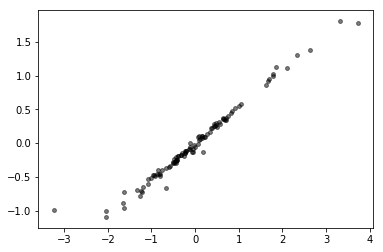

In [6]:
plt.scatter(np.ravel(crp_logo_nn_df.df),np.ravel(crp_logo_df.df),alpha=0.5,s=15,c='black')

In [7]:
from scipy.stats.stats import pearsonr  
pearsonr(np.ravel(crp_logo_nn_df.df),np.ravel(crp_logo_df.df))[0]

0.9865513757343216

Text(0,0.5,'$-\\Delta \\Delta G$ ($k_{cal}/mol$)')

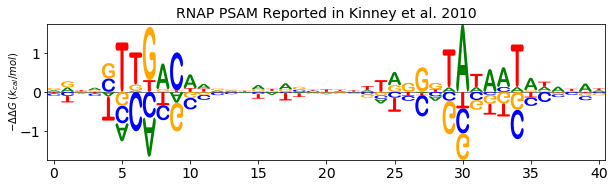

In [8]:
rnap_df.columns = ['A','C','G','T']
rnap_logo_df = logomaker.Logo(-rnap_df,center_values=True, font_name='Arial Rounded MT Bold')
plt.tick_params(labelsize=14)
plt.title('RNAP PSAM Reported in Kinney et al. 2010',fontsize=14)
plt.ylabel("$-\Delta \Delta G$ ($k_{cal}/mol$)", labelpad=-1)

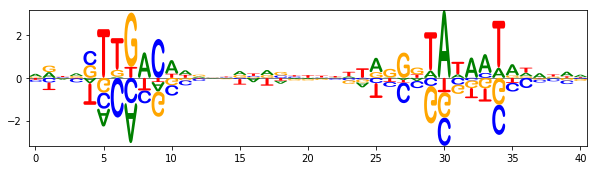

In [9]:
rnap_df_nn = pd.read_csv('inferred_rnap_matrix.csv',)
del rnap_df_nn['Unnamed: 0']
rnap_logo_nn_df = logomaker.Logo(rnap_df_nn,center_values=True, font_name='Arial Rounded MT Bold')

0.9946623853513459

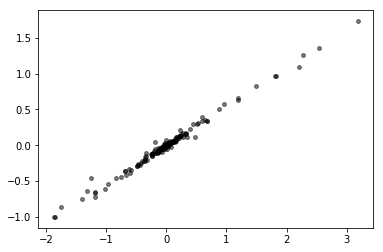

In [10]:
plt.scatter(np.ravel(rnap_logo_nn_df.df),np.ravel(rnap_logo_df.df),alpha=0.5,s=15,c='black')
pearsonr(np.ravel(rnap_logo_nn_df.df),np.ravel(rnap_logo_df.df))[0]